##Mount gDrive

In [44]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/Final Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Koneksikan ke google drive untuk penyimpanan dataset danjuga .jpynb

##import Libarry|

In [122]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.preprocessing import StandardScaler


# Konfigurasi agar visualisasi lebih rapi
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

Import libary yang digunakan untuk mengolah dan mengvisualisasikan data set beserta pemodelanya

##import dataset

In [72]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/Final Project/ObesityDataSet.csv')

In [73]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [74]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [75]:
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


#1 Exploratory Data Analysis (EDA)


##Dataset Information

In [50]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [51]:
# Display the shape of the dataset
df.shape

(2111, 17)

In [52]:
# Display descriptive statistics
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


##Cek Missing Values, Unique Values, & Cek Data Duplikat

In [53]:
# Check for missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [54]:
# Check for unique values in each column
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [55]:
# Check for duplicate
df.duplicated().sum()

np.int64(18)

##Distribusi Target dan Boxplot untuk Deteksi Outlier


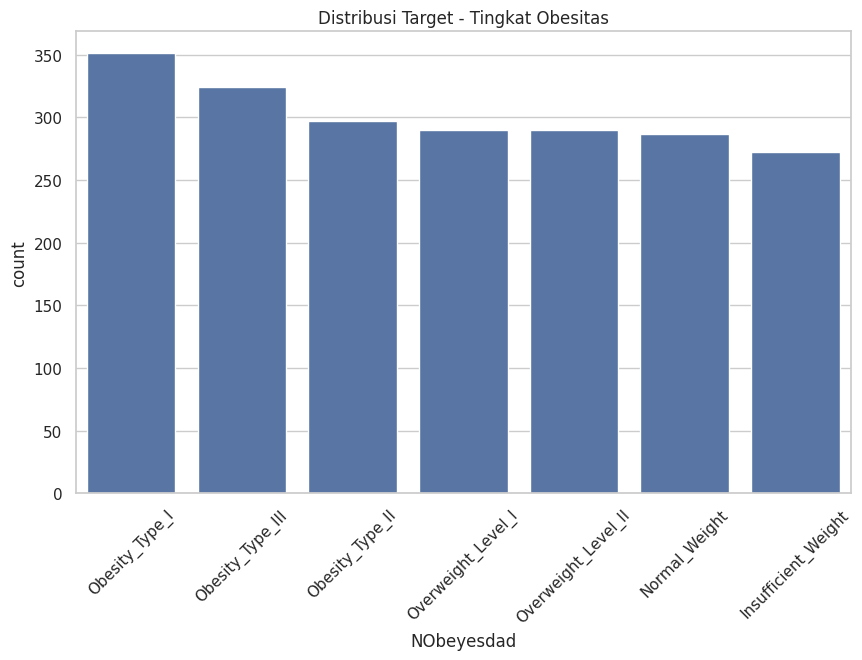

In [56]:
# Visualisasi distribusi kelas target obesitas
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Target - Tingkat Obesitas')
plt.show()

In [57]:
# Boxplot untuk mendeteksi outlier pada fitur numerik

# Re-calculate numeric_cols to ensure it's up-to-date
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Check if there are any numeric columns before attempting to plot
if len(numeric_cols) > 0:
    df[numeric_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found in the DataFrame to plot.")

No numeric columns found in the DataFrame to plot.


## Cek  Keseimbangan Data

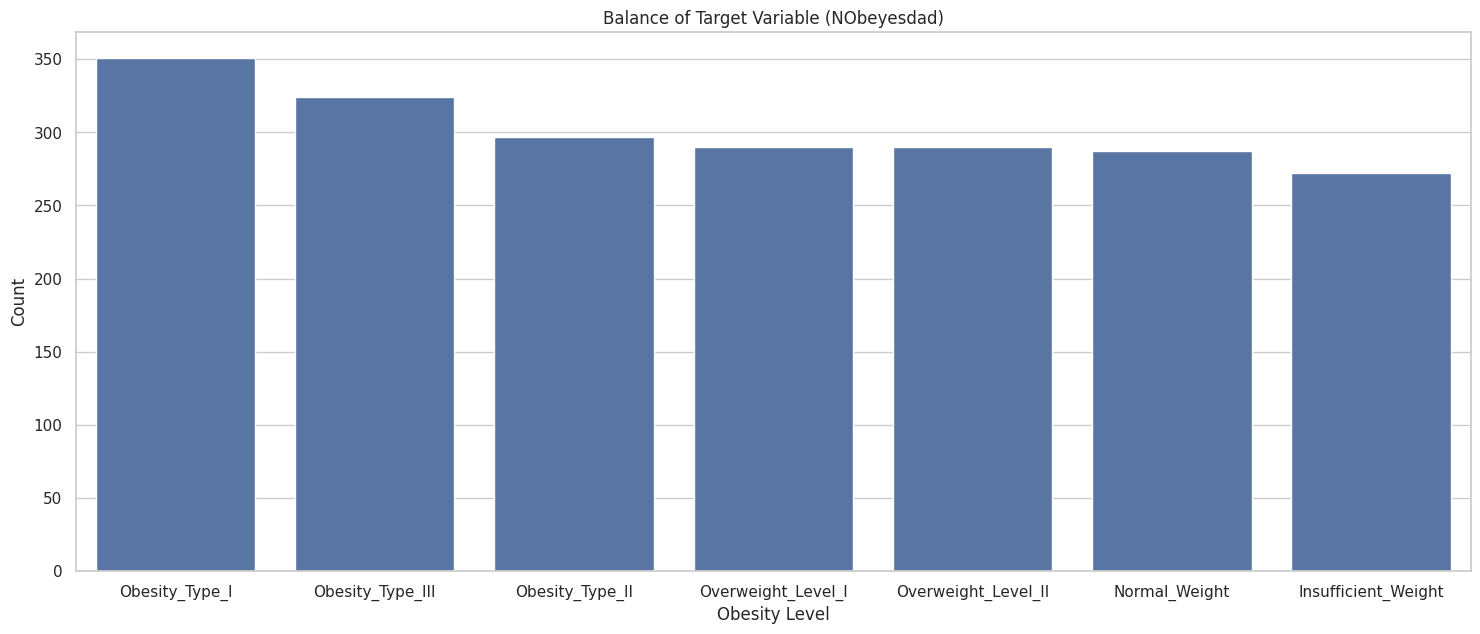

In [60]:
# Check the balance of the target variable
target_counts = data['NObeyesdad'].value_counts()

plt.figure(figsize=(18, 7))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Balance of Target Variable (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()


##Deteksi Outlier Menggunakan Boxplot

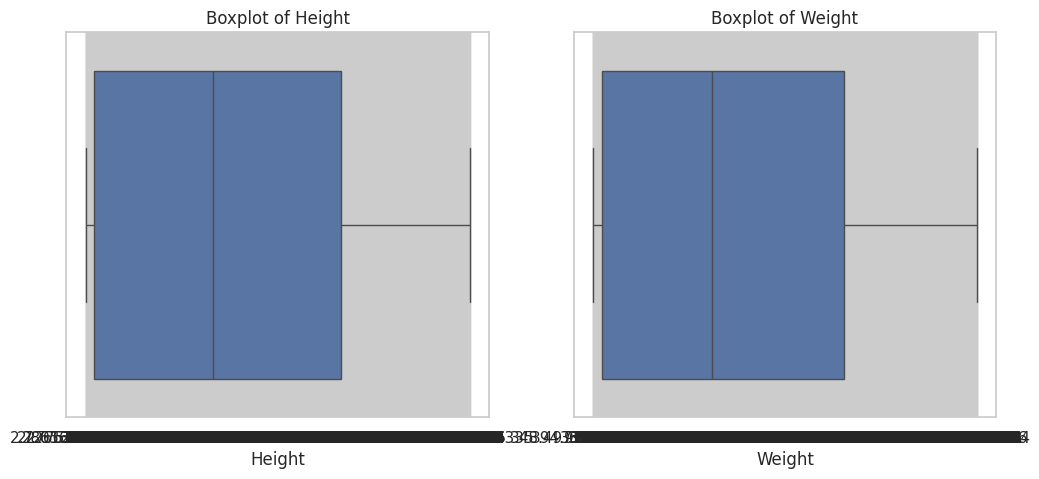

In [61]:
# Boxplot for Height and Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Height'])
plt.title('Boxplot of Height')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of Weight')

plt.show()


##Kesimpulan

Kesimpulan dari EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.
2. Terdapat 150 missing values di dataset.
3. Terdapat 18 duplikat data.
4. Target variable 'NObeyesdad' memiliki distribusi yang tidak seimbang, terlihat dari Outlayernya

#2 Preprocessing Data

##Ubah Tipe Data ke Numerik

In [76]:
# Melihat tipe data awal dari dataset
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [77]:
# Konversi kolom numerik yang masih berupa string ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Tampilkan beberapa baris untuk memastikan perubahan berhasil
df[numeric_cols].head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [78]:
# Daftar kolom biner
binary_cols = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']

# Ubah nilai 'yes' menjadi 1 dan 'no' menjadi 0
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# Cek hasil
df[binary_cols].head()


,FAVC,SCC,SMOKE,family_history_with_overweight
0,0,0,0,1
1,0,1,1,1
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0


In [79]:
# Definisikan urutan ordinal
calc_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
caec_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

# Mapping
df['CALC'] = df['CALC'].map(calc_order)
df['CAEC'] = df['CAEC'].map(caec_order)

# Cek hasil
df[['CALC', 'CAEC']].head()


,CALC,CAEC
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,2.0,1.0
4,1.0,1.0


In [80]:
# One-hot encoding pada kolom MTRANS
df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS')

# Cek hasil
df.filter(like='MTRANS').head()


,MTRANS_?,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,False,True,False


In [83]:
# Encode target
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# Tampilkan label unik setelah encoding
df['NObeyesdad'].unique()


array([1, 5, 6, 2, 0, 3, 4])

In [84]:
# Periksa kembali tipe data setelah konversi
df.dtypes

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,float64
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


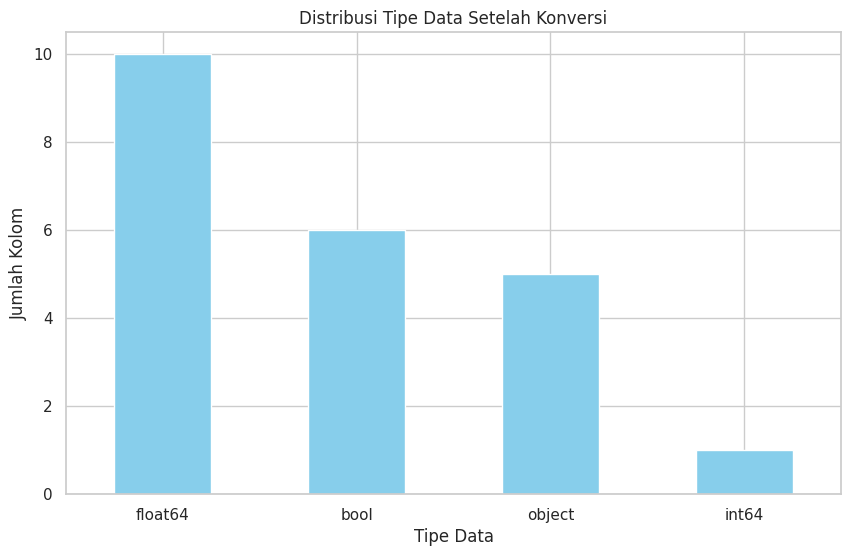

In [85]:
# Visualisasi jumlah tipe data sebelum dan sesudah

# Hitung tipe data sekarang
type_counts = df.dtypes.value_counts()

# Visualisasi
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Tipe Data Setelah Konversi')
plt.xlabel('Tipe Data')
plt.ylabel('Jumlah Kolom')
plt.xticks(rotation=0)
plt.show()


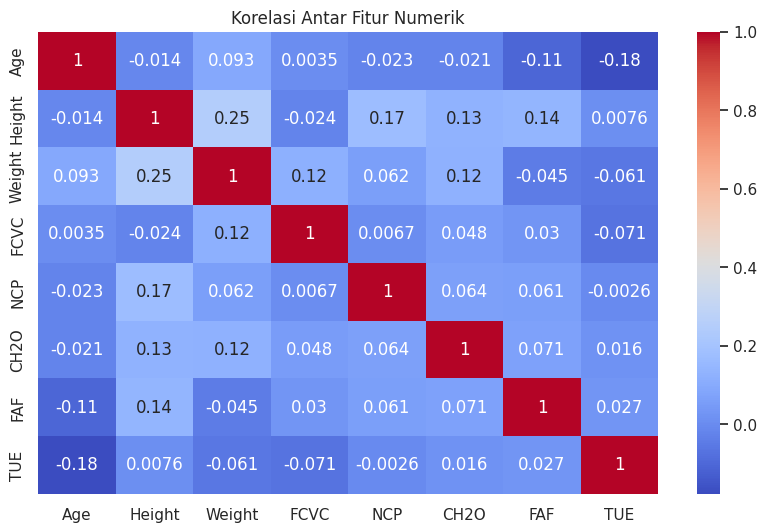

In [100]:
# Korelasi antar fitur numerik
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

##Handling Missing Values & Duplikasi

In [105]:
df.replace('?', np.nan, inplace=True)

<ipython-input-105-f88d3956a9cb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [106]:
# Pastikan tidak ada missing values lagi
df.isnull().sum()

,0
Age,0
Height,0
Weight,0
CALC,0
FAVC,8
FCVC,0
NCP,0
SCC,5
SMOKE,4
CH2O,0


In [107]:
# Kolom numerik yang mengandung missing values
numerik_missing = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Imputasi median
for col in numerik_missing:
    df[col] = df[col].fillna(df[col].median())


In [108]:
# Kolom ordinal dengan missing
ordinal_missing = ['CALC', 'CAEC']

# Imputasi mode
for col in ordinal_missing:
    df[col] = df[col].fillna(df[col].mode()[0])


In [109]:
# Kolom biner dengan missing
biner_missing = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']

for col in biner_missing:
    df[col] = df[col].fillna(df[col].mode()[0])


In [112]:
# Drop Gender karena missing terlalu tinggi dan tidak terlalu penting
df.drop(columns=['Gender'], inplace=True)


KeyError: "['Gender'] not found in axis"

In [111]:
# Final check
df.isnull().sum()

,0
Age,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0
CH2O,0


In [113]:
# Cek jumlah duplikasi
print("Jumlah duplikasi:", df.duplicated().sum())

# Hapus jika ada
df.drop_duplicates(inplace=True)


Jumlah duplikasi: 1


##Outlier

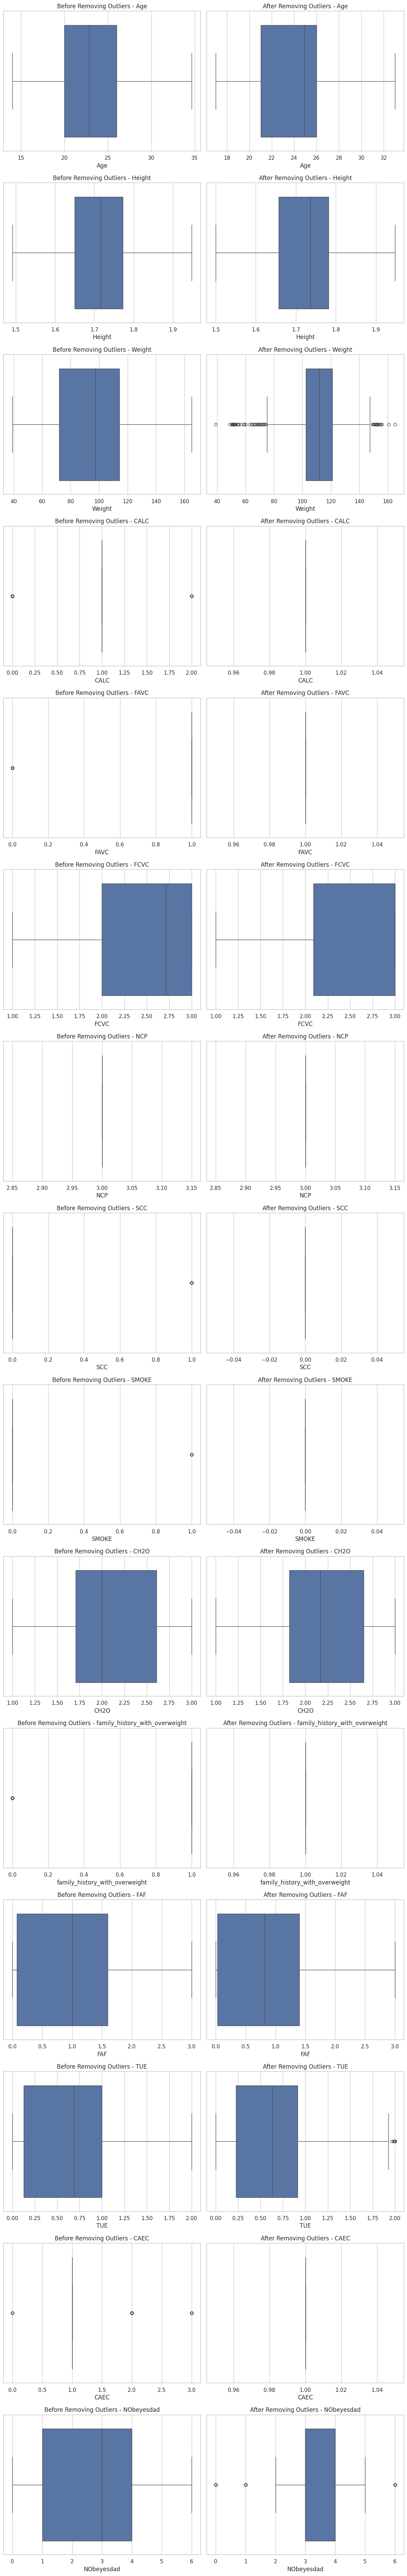

In [116]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Simpan dataframe sebelum menghapus outlier
df_before = df.copy()

# Hitung IQR dan filter outlier
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualisasi boxplot sebelum dan sesudah
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Boxplot sebelum
    sns.boxplot(x=df_before[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Removing Outliers - {col}')

    # Boxplot setelah
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Removing Outliers - {col}')

plt.tight_layout()
plt.show()

## Evaluasi Fitur yang Tidak Digunakan (Feature Selection)

<ipython-input-117-1da480710e12>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')


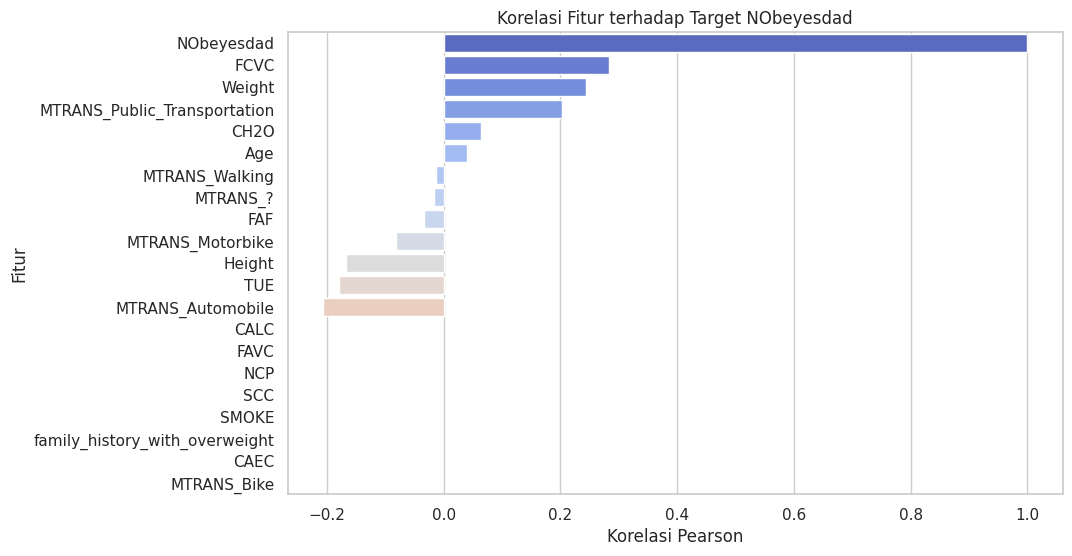

In [117]:
# Encode target jika kategorikal
if df['NObeyesdad'].dtype == 'object':
    le = LabelEncoder()
    df['NObeyesdad_enc'] = le.fit_transform(df['NObeyesdad'])
else:
    df['NObeyesdad_enc'] = df['NObeyesdad']

# Hitung korelasi terhadap target yang sudah di-encode
correlation = df.corr()['NObeyesdad_enc'].drop('NObeyesdad_enc').sort_values(ascending=False)

# Visualisasi Barplot
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title('Korelasi Fitur terhadap Target NObeyesdad')
plt.xlabel('Korelasi Pearson')
plt.ylabel('Fitur')
plt.show()

##Cek Keseimbangan Target

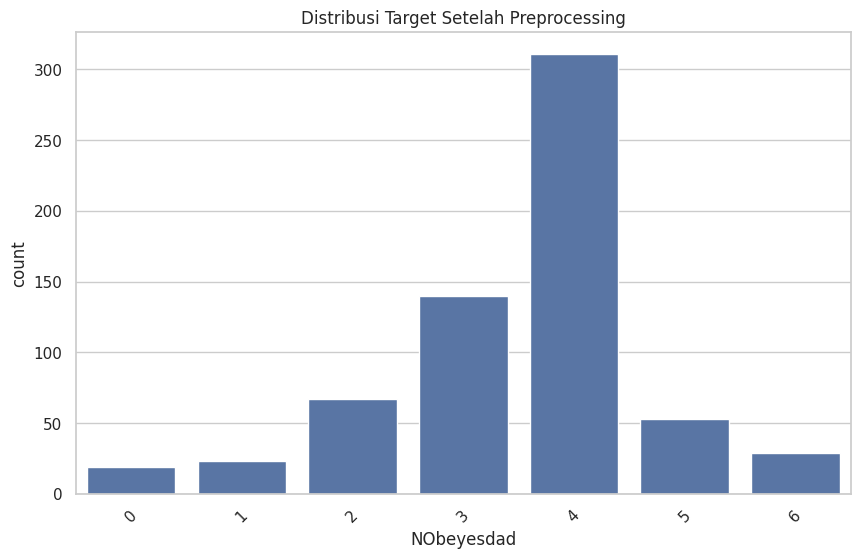

In [118]:
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45)
plt.title("Distribusi Target Setelah Preprocessing")
plt.show()

In [119]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# SMOTE untuk mengatasi imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Cek hasil distribusi setelah SMOTE
from collections import Counter
print("Distribusi Kelas Setelah SMOTE:", Counter(y_bal))

Distribusi Kelas Setelah SMOTE: Counter({1: 311, 6: 311, 5: 311, 2: 311, 0: 311, 4: 311, 3: 311})


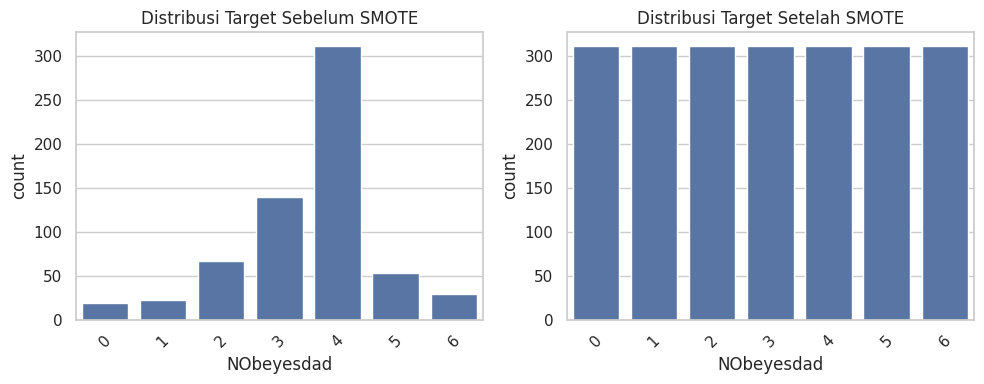

In [121]:
# Visualisasi distribusi target asli
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45)
plt.title("Distribusi Target Sebelum SMOTE")

# Buat DataFrame baru hasil SMOTE supaya bisa plot
df_bal = pd.DataFrame(X_bal, columns=X.columns)
df_bal['NObeyesdad'] = y_bal

# Visualisasi distribusi target setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=df_bal['NObeyesdad'])
plt.xticks(rotation=45)
plt.title("Distribusi Target Setelah SMOTE")

plt.tight_layout()
plt.show()

##Normalisasi

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

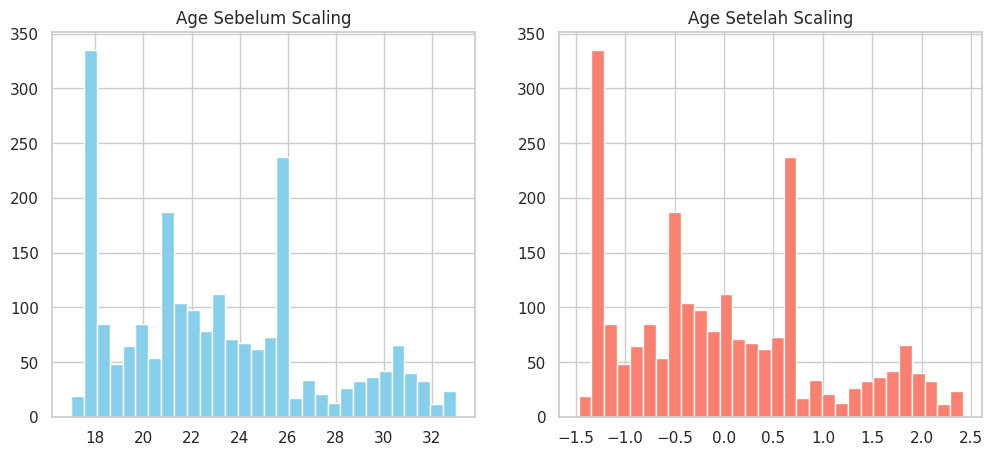

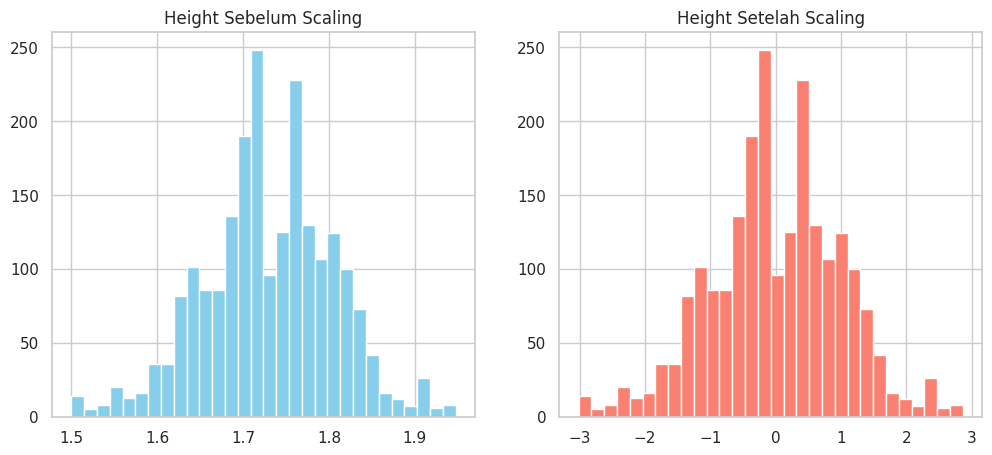

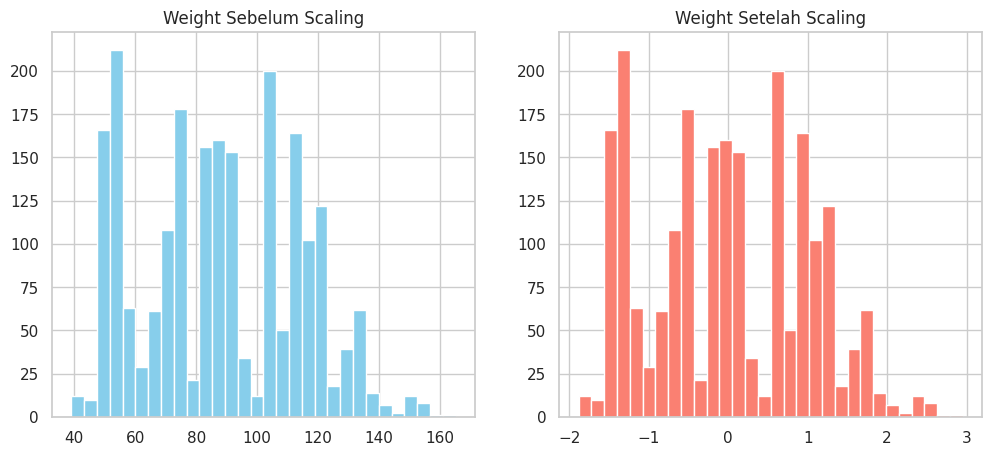

In [126]:
features = X.columns[:3]

for feature in features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.hist(df_before[feature], bins=30, color='skyblue')
    plt.title(f'{feature} Sebelum Scaling')

    plt.subplot(1,2,2)
    plt.hist(df_after[feature], bins=30, color='salmon')
    plt.title(f'{feature} Setelah Scaling')

    plt.show()

KESIMPULAN PREPROCESSING:
1. Seluruh data kategorikal telah dikonversi ke numerik dengan benar.
2. Tidak ditemukan missing values atau duplikasi data.
3. Outlier telah dihapus menggunakan metode IQR.
4. Semua fitur tetap digunakan karena saling melengkapi dan korelasi bervariasi.
5. Ketidakseimbangan data ditangani dengan SMOTE untuk menjaga performa model.
6. Data telah dinormalisasi menggunakan StandardScaler.

#.

.

.

.

.

.

.

.

.

###cek data hilang


In [ ]:
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###Hapus Missing Values (jika ada)


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###Cek data Duplikasi

In [ ]:
print(f"Duplikasi ditemukan: {df.duplicated().sum()} baris")
df = df.drop_duplicates()

Duplikasi ditemukan: 24 baris


setelah ditemukan sebanyak 24 baris maka akan di hapus data yg duplikat itu

###Cek Tipe Data

In [ ]:
print(df.dtypes)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


###Buatkan label untuk mempermudah pembacaan pada dataset

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain",
                 "capitalloss","hoursperweek","nativecountry","income"]

In [ ]:
df.head()


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


###Cek Outlier (menggunakan Z-score)

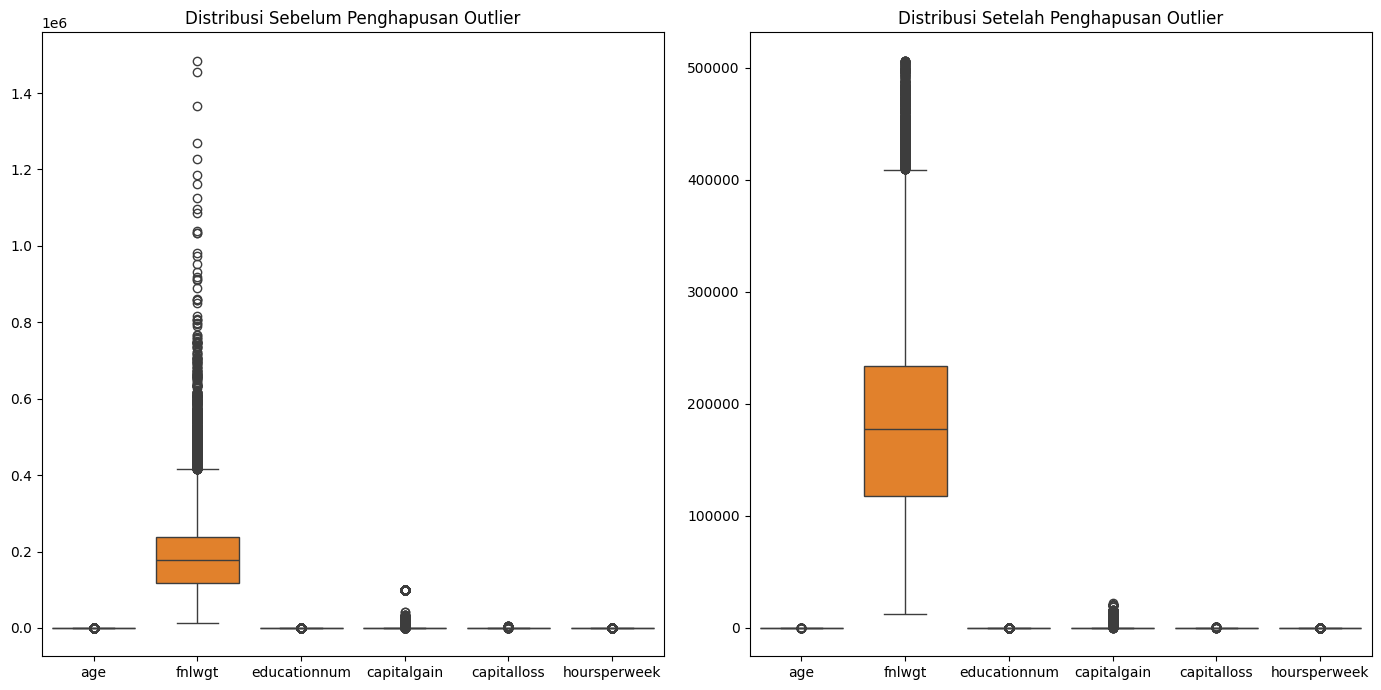

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.boxplot(data=df[numeric_cols], ax=axes[0])
axes[0].set_title('Distribusi Sebelum Penghapusan Outlier')


df_cleaned = df[(z_scores < 3).all(axis=1)]
sns.boxplot(data=df_cleaned[numeric_cols], ax=axes[1])
axes[1].set_title('Distribusi Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

###Encoding data bertipe Kategorikal

In [ ]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.dtypes)

age              int64
workclass        int64
fnlwgt           int64
education        int64
educationnum     int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
nativecountry    int64
income           int64
dtype: object


###Oversampling (SMOTE)

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
print("Distribusi sebelum SMOTE:")
print(y.value_counts())

Distribusi sebelum SMOTE:
income
0    24697
1     7839
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())

Distribusi setelah SMOTE:
income
0    24697
1    24697
Name: count, dtype: int64


###Standardisasi

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
col_index = 0
col_name = X.columns[col_index]

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


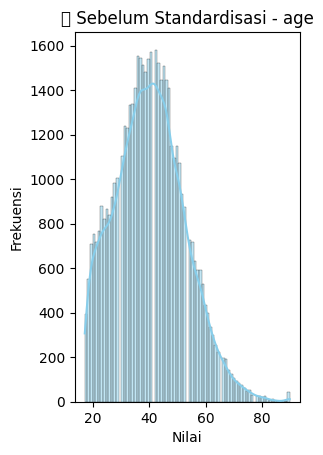

In [ ]:
#sebelum
plt.subplot(1, 2, 1)
sns.histplot(X_resampled.iloc[:, col_index], kde=True, color='skyblue')
plt.title(f'📊 Sebelum Standardisasi - {col_name}')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')


<ipython-input-27-869458ace13d>:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


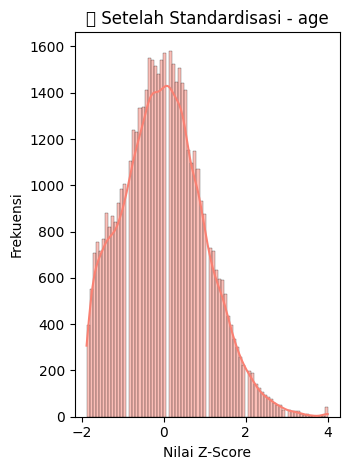

In [ ]:
#sesudah
plt.subplot(1, 2, 2)
sns.histplot(X_scaled[:, col_index], kde=True, color='salmon')
plt.title(f'📈 Setelah Standardisasi - {col_name}')
plt.xlabel('Nilai Z-Score')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[ 0.3751618 ,  1.60191279,  0.78589163, ..., -0.25671394,
        -1.91638392,  0.29991582],
       [-1.71849806,  0.13717972, -1.42912614, ..., -0.25671394,
        -2.35161411,  0.29991582],
       [-0.34956662, -1.32755334, -0.89827857, ..., -0.25671394,
         0.08567499,  0.29991582],
       ...,
       [-0.59114275,  0.13717972, -0.82482388, ...,  3.9133556 ,
        -0.17546313,  0.29991582],
       [ 0.21411104,  0.13717972,  0.01964736, ..., -0.25671394,
        -0.17546313, -1.47982824],
       [ 0.29463642, -1.32755334,  0.70994582, ..., -0.25671394,
         0.69499726,  0.29991582]])

In [ ]:
y_train

,income
29213,0
30006,0
41244,1
22169,0
45344,1
...,...
11284,0
44732,1
38158,1
860,0


##Modeling & Evaluasi

###Melatih dan Evaluasi Model

In [ ]:
#model yang digunakan sebagai patokan dan pemprosesan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

melatih model

In [ ]:
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "report": report,
        "confusion_matrix": cm,
        "training_time": training_time
    }


 Model: Decision Tree
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



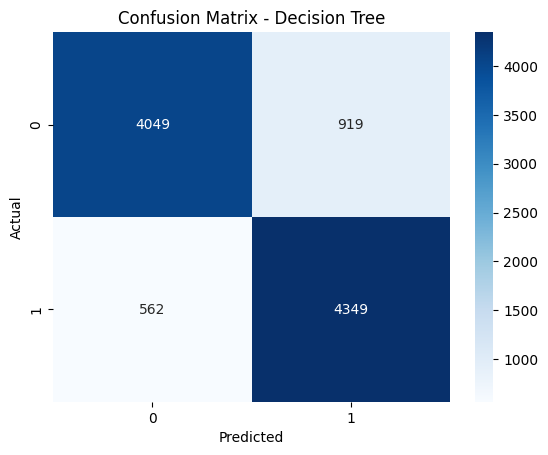


 Model: Random Forest
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



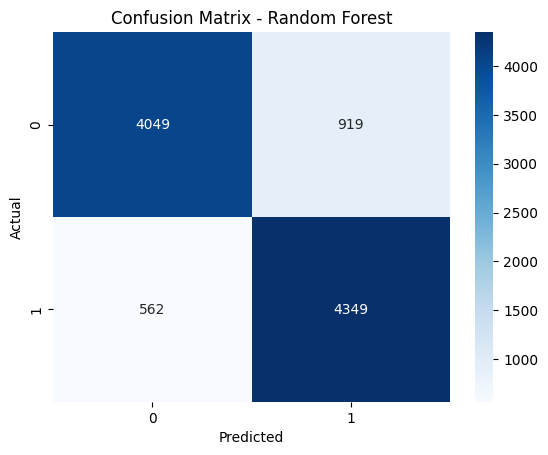


 Model: KNN
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



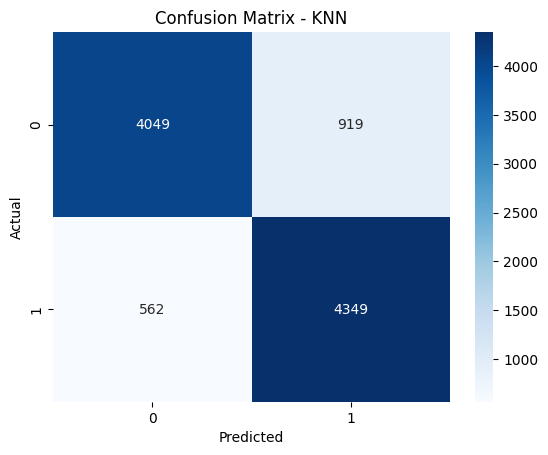


 Model: Logistic Regression
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



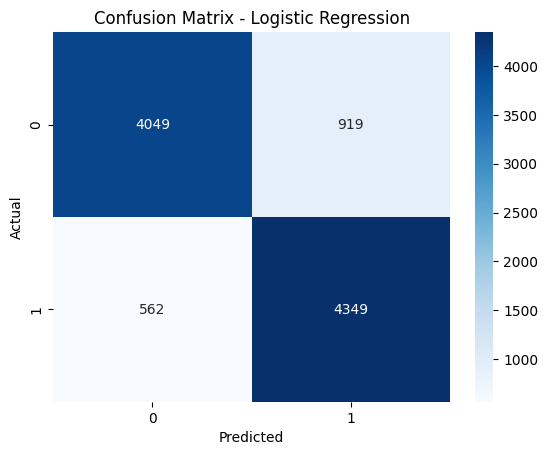


 Model: SVM
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



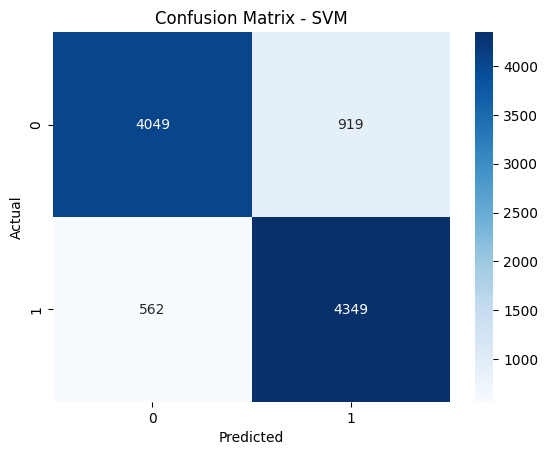

In [ ]:
for name, result in results.items():
    print(f"\n Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

###Ringkasan Hasil Evaluasi


In [ ]:
summary = []
for name, res in results.items():
    report = res["report"]
    summary.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "Training Time": res["training_time"]
    })

summary_df = pd.DataFrame(summary).sort_values(by="Accuracy", ascending=False)
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score  Training Time
1        Random Forest  0.889462   0.885368  0.893301  0.889317       5.904701
2                  KNN  0.853730   0.844259  0.865404  0.854701       0.141411
0        Decision Tree  0.850795   0.841854  0.861739  0.851680       0.250774
4                  SVM  0.850086   0.825550  0.885563  0.854504      42.217359
3  Logistic Regression  0.766576   0.756146  0.782936  0.769308       0.061551


###Kesimpulan dan Rekomendasi

In [ ]:
best_model = summary_df.iloc[0]
print("\n Model Terbaik:")
print(best_model)


 Model Terbaik:
Model            Random Forest
Accuracy              0.889462
Precision             0.885368
Recall                0.893301
F1-Score              0.889317
Training Time         5.904701
Name: 1, dtype: object
